In [1]:
# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
print("Hi")

Hi


In [3]:
import tensorflow as tf
import os

In [4]:
import cv2


In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
data_dir='data'

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data=tf.keras.utils.image_dataset_from_directory('data',color_mode='rgb',shuffle=True)


Found 5466 files belonging to 2 classes.


In [9]:
data_iterator=data.as_numpy_iterator()

In [10]:
batch=data_iterator.next()

In [11]:
batch[0].shape

(32, 256, 256, 3)

In [12]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1])

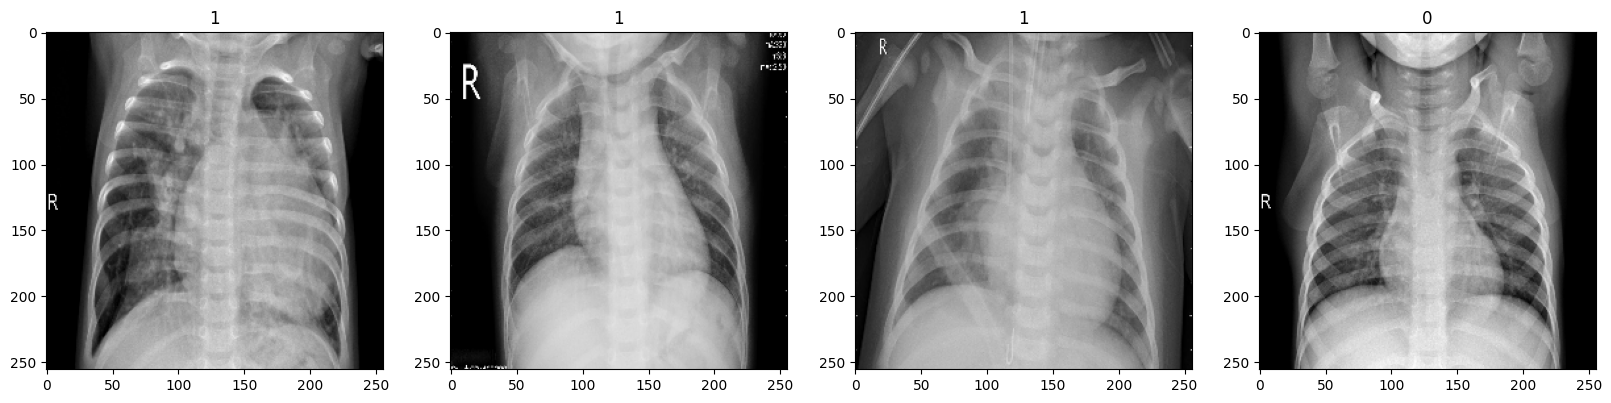

In [13]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [14]:
data = data.map(lambda x,y: (x/255, y))

In [15]:
data.as_numpy_iterator().next()

(array([[[[0.45209864, 0.45209864, 0.45209864],
          [0.43867955, 0.43867955, 0.43867955],
          [0.45533952, 0.45533952, 0.45533952],
          ...,
          [0.4045526 , 0.4045526 , 0.4045526 ],
          [0.4801264 , 0.4801264 , 0.4801264 ],
          [0.5270057 , 0.5270057 , 0.5270057 ]],
 
         [[0.4376083 , 0.4376083 , 0.4376083 ],
          [0.44242045, 0.44242045, 0.44242045],
          [0.44849408, 0.44849408, 0.44849408],
          ...,
          [0.3600673 , 0.3600673 , 0.3600673 ],
          [0.3772339 , 0.3772339 , 0.3772339 ],
          [0.45430136, 0.45430136, 0.45430136]],
 
         [[0.42436427, 0.42436427, 0.42436427],
          [0.4403033 , 0.4403033 , 0.4403033 ],
          [0.44518858, 0.44518858, 0.44518858],
          ...,
          [0.3637895 , 0.3637895 , 0.3637895 ],
          [0.37109783, 0.37109783, 0.37109783],
          [0.40331846, 0.40331846, 0.40331846]],
 
         ...,
 
         [[0.02269455, 0.02269455, 0.02269455],
          [0.00926

In [16]:
scaled_iterator=data.as_numpy_iterator()

In [17]:
batch=scaled_iterator.next()

In [18]:
batch[0].min()

0.0

In [19]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [21]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = keras.Sequential([
    keras.Input(shape=(256,256,3)),
    keras.layers.Conv2D(16, (3,3), 1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Conv2D(32, (3,3), 1, activation='relu'),
    keras.layers.MaxPooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [25]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 123008)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │      31,490,304 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,495,649 (120.15 MB)

 Trainable params: 31,495,649 (120.15 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
hist = model.fit(train, epochs=5, validation_data=val)

Epoch 1/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 180s 1s/step - accuracy: 0.7420 - loss: 2.2883 - val_accuracy: 0.9439 - val_loss: 0.1505
Epoch 2/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9471 - loss: 0.1400 - val_accuracy: 0.9531 - val_loss: 0.1280
Epoch 3/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 127s 1s/step - accuracy: 0.9589 - loss: 0.1078 - val_accuracy: 0.9439 - val_loss: 0.1439
Epoch 4/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.9689 - loss: 0.0823 - val_accuracy: 0.9412 - val_loss: 0.1755
Epoch 5/5
119/119 ━━━━━━━━━━━━━━━━━━━━ 131s 1s/step - accuracy: 0.9658 - loss: 0.0969 - val_accuracy: 0.9485 - val_loss: 0.1524


In [27]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [28]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [29]:
print("Hello")

Hello


In [30]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [31]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.9834711, shape=(), dtype=float32) tf.Tensor(0.9394737, shape=(), dtype=float32) tf.Tensor(0.94669116, shape=(), dtype=float32)


In [32]:
import cv2

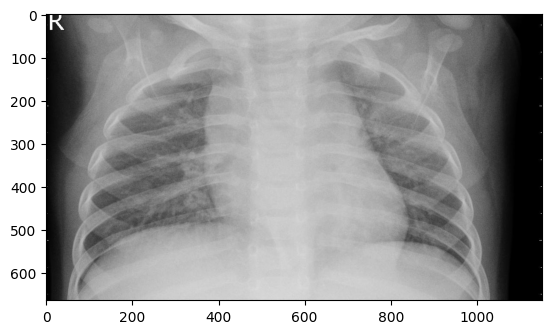

In [33]:
img=cv2.imread('P3.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

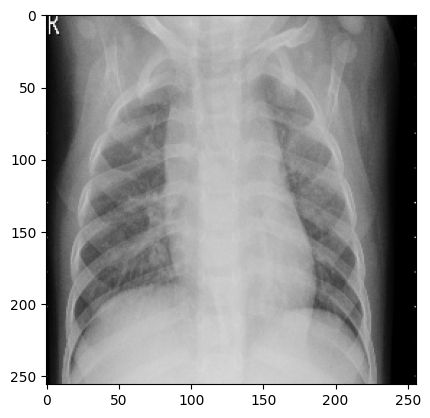

In [34]:
resize=tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [35]:
resize.shape

TensorShape([256, 256, 3])

In [36]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [37]:
yhat=model.predict(np.expand_dims(resize/255,0))
yhat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


array([[0.99167484]], dtype=float32)

In [53]:
def predict(model,img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    return predictions

In [40]:
new_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "val",
    seed=123,
    shuffle=True,
    image_size=(256,256),
    batch_size=8
)


Found 16 files belonging to 2 classes.


In [41]:
len(new_dataset)

2

In [43]:
test_ds=tf.keras.utils.image_dataset_from_directory('val',color_mode='rgb',shuffle=True)

Found 16 files belonging to 2 classes.


In [60]:
class_names=test_ds.class_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


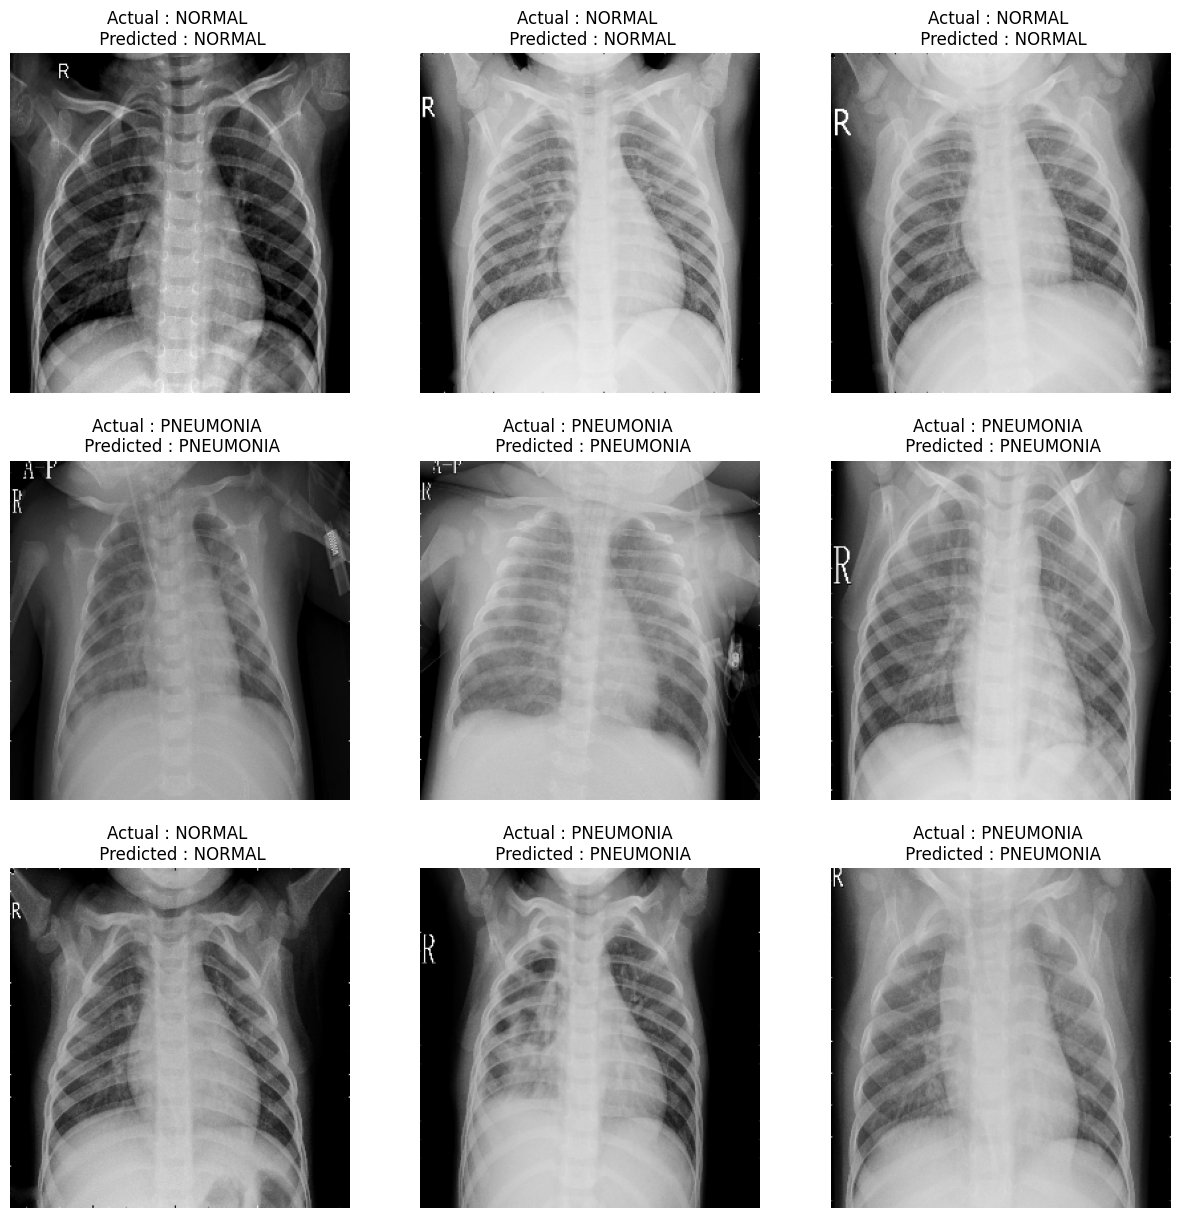

In [75]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        ans = predict(model, images[i].numpy())
        pred=0
        if ans>0.5:
            pred=1
            
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual : {actual_class} \n Predicted : {class_names[pred]}")
        
        plt.axis("off")

In [ ]:
for image_batch, labels_batch in new_dataset.take(2):
    print(image_batch.shape)
    print(labels_batch.numpy())

In [ ]:
dataset.class_names

In [ ]:
class_names=dataset.class_names

In [ ]:
import numpy as np
for images_batch, labels_batch in new_dataset.take(1):
    
    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])

In [76]:
model_version=1
model.save('model2.keras')